# Ta-Lib suite of financial data indicators

In [3]:
%%capture

import warnings
warnings.filterwarnings("ignore")

# Data analysis and processing
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt #Chart Drawing Kit
import datetime #Time Processing Suite
import talib
import mplfinance as mpf

# WebCrawler
import pandas_datareader.data as web
import yfinance as yf  # Yahoo Finance

# Data normalization 
from sklearn.preprocessing import MinMaxScaler  


# Keras & sklearn imports
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
from keras.callbacks import EarlyStopping


from math import sqrt
from keras.utils.vis_utils import plot_model   # plot_model 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [4]:
start = datetime.datetime(2018,4,1) 
end = datetime.datetime(2021,7,30) 
df = yf.download('0050.TW', start, end) 

df.head(3)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-02,82.849998,82.949997,82.150002,82.250000,82.250000,3737299
2018-04-03,81.500000,81.550003,81.199997,81.500000,81.500000,6187523
2018-04-09,82.150002,82.300003,81.599998,82.199997,82.199997,3401430


In [5]:
df2 = yf.download('0050.TW',period='60d',interval='1d') 
df2.head(3)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-23,110.250000,110.349998,109.349998,109.699997,109.699997,14598986
2022-09-26,108.050003,108.050003,107.150002,107.650002,107.650002,19920826
2022-09-27,107.800003,107.949997,107.000000,107.500000,107.500000,8962778


In [6]:
df3 = yf.download('0050.TW',period='1mo',interval='1d') 
df3.head(3)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-16,115.000000,115.750000,113.849998,114.500000,114.500000,23671241
2022-11-17,113.949997,114.650002,112.849998,114.550003,114.550003,13352418
2022-11-18,114.900002,115.849998,114.050003,114.250000,114.250000,10656075


In [7]:
df4 = yf.download('0050.TW',period='3d',interval='1m') # Specify data collected up to three days ago (3d), at a frequency of one minute
df4.head(3)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-14 09:00:00,114.099998,114.150002,114.000000,114.150002,114.150002,0
2022-12-14 09:01:00,114.099998,114.199997,114.099998,114.150002,114.150002,46000
2022-12-14 09:02:00,114.199997,114.199997,114.099998,114.150002,114.150002,189000


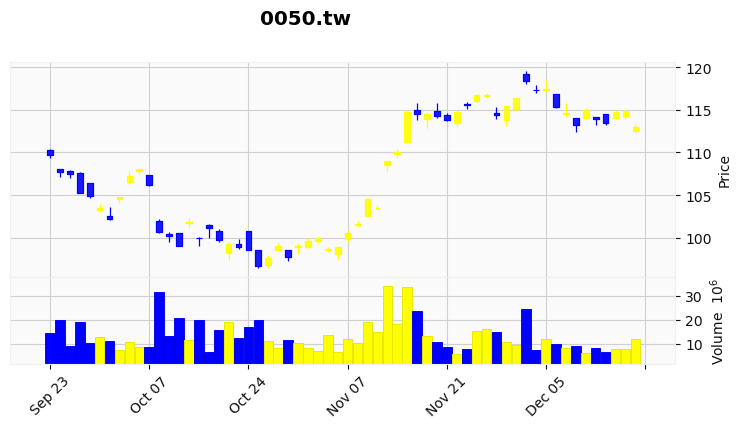

In [8]:
#Draw K-line chart
mc = mpf.make_marketcolors(up='yellow', down='blue', inherit=True) # Customize chart appearance and set k-line chart colors
exterior = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc) # Save the chart appearance
#For detailed settings, please refer to [https://pypi.org/project/mplfinance/]

#volume controls whether prices are displayed below
k_plot = mpf.plot(df2, style=exterior, type='candle', volume=True, figratio=(30,14), figscale=0.75, title='0050.tw',)

# Ta-Lib Implementation



In [9]:
# Parameter setting: timeperiod: the number of days parameter, you can freely set the number of days, the default is 14

_adx = talib.ADX(df.High, df.Low, df.Close, timeperiod = 7)

_rsi = talib.RSI(df.Close,  timeperiod = 7)

_dema = talib.DEMA(df.Close, timeperiod=30)

In [10]:
# Average Directional Index (ADX)
# ADX above 30 means the price has entered a trend. And below 30 means that the exchange rate is fluctuating within the range. When the ADX exceeds 30, the larger the reading of the ADX, the more pronounced the price trend.
_adx

Date
2018-04-02          NaN
2018-04-03          NaN
2018-04-09          NaN
2018-04-10          NaN
2018-04-11          NaN
                ...    
2021-07-23    23.930631
2021-07-26    25.923251
2021-07-27    27.981423
2021-07-28    32.696474
2021-07-29    34.881715
Length: 810, dtype: float64

In [11]:
# Relative Strength Index (RSI)
# The value calculated from the average increase and average decrease of a stock price, which is an indicator of the strength or weakness of a stock price during the observation period.
# RSI = (average up/(average up + average down)) x 100
_rsi 

Date
2018-04-02          NaN
2018-04-03          NaN
2018-04-09          NaN
2018-04-10          NaN
2018-04-11          NaN
                ...    
2021-07-23    43.052091
2021-07-26    34.833045
2021-07-27    34.512735
2021-07-28    23.618134
2021-07-29    44.866997
Length: 810, dtype: float64

In [12]:
# Double Exponential Moving Average (DEMA)
# DEMA = 2 * N-Day EMA - EMA of N-Day EMA 
_dema 

Date
2018-04-02           NaN
2018-04-03           NaN
2018-04-09           NaN
2018-04-10           NaN
2018-04-11           NaN
                 ...    
2021-07-23    138.904710
2021-07-26    138.651695
2021-07-27    138.414866
2021-07-28    137.930754
2021-07-29    137.772730
Length: 810, dtype: float64

# Data Processing

In [13]:
# axis = 0 for Down , axis = 1 for across
# inplace = True means operate directly from the DataFrame 
df.drop(['Open', 'High', 'Low', 'Volume','Adj Close'], axis=1, inplace=True) 

In [14]:
df.head(3)

,Close
Date,
2018-04-02,82.250000
2018-04-03,81.500000
2018-04-09,82.199997


Q : Diviser le dataset df en 80% d'entrainement et 20% de test 

In [15]:
split_point = int(len(df)*0.8) 
train = df.iloc[:split_point].copy()
test = df.iloc[split_point:].copy()


In [16]:
# Data normalization
scaler = MinMaxScaler(feature_range=(-1, 1))

#If the data is not one-dimensional, we need to reshape the data and adjust it to (data length,1) 

train_set= train.values.reshape(-1,1)
train_sc = scaler.fit_transform(train_set)

test_set= test.values.reshape(-1,1)
test_sc = scaler.fit_transform(test_set)

In [17]:
predict_days = 1 
X_train = train_sc[:-predict_days]
y_train = train_sc[predict_days:]
X_test = test_sc[:-predict_days]
y_test = test_sc[predict_days:]

In [18]:
#Verify the shape of the dataset, it's important! 
#You can tell others the size of the training set and the dataset
X_train = X_train.reshape((X_train.shape[0],1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0],1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(647, 1, 1) (647, 1) (161, 1, 1) (161, 1)


# Build the model

> Model fit tunable parameters.
>- **epochs** (iterations): number of training sessions 
>- **batch_size** : how many data are entered at a time  
>- **verbose** (progress bar mode): 0, 1, 2 modes to choose from
>- **callbacks** (callback function): refer to this page [https://keras.io/zh/callbacks/]

In [19]:
# Build LSTM model
model = Sequential()

# Add LSTM layer with 50 units, not returning sequences, and input shape of (X_train.shape[1], 1)
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))

# Add dropout layer with forgetting rate of 0.2
model.add(Dropout(0.2))

# Add output layer with 1 unit
model.add(Dense(1))

# Compile model with mean squared error loss, Adam optimizer, and accuracy metric
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Use EarlyStopping to stop training when the loss stops improving
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)

# Fit model on training data, using a batch size of 1, and using the EarlyStopping callback
history = model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2, shuffle=True, callbacks=[early_stop])


Epoch 1/20
647/647 - 5s - loss: 0.0498 - accuracy: 0.0031 - 5s/epoch - 7ms/step
Epoch 2/20
647/647 - 2s - loss: 0.0034 - accuracy: 0.0031 - 2s/epoch - 3ms/step
Epoch 3/20
647/647 - 2s - loss: 0.0033 - accuracy: 0.0031 - 2s/epoch - 3ms/step
Epoch 4/20
647/647 - 2s - loss: 0.0035 - accuracy: 0.0031 - 2s/epoch - 3ms/step
Epoch 5/20
647/647 - 2s - loss: 0.0031 - accuracy: 0.0031 - 2s/epoch - 3ms/step
Epoch 6/20
647/647 - 2s - loss: 0.0030 - accuracy: 0.0031 - 2s/epoch - 3ms/step
Epoch 7/20
647/647 - 2s - loss: 0.0034 - accuracy: 0.0031 - 2s/epoch - 3ms/step
Epoch 8/20
647/647 - 2s - loss: 0.0032 - accuracy: 0.0031 - 2s/epoch - 3ms/step
Epoch 8: early stopping


# Model training visualization

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [21]:
plot_model(model, 'model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


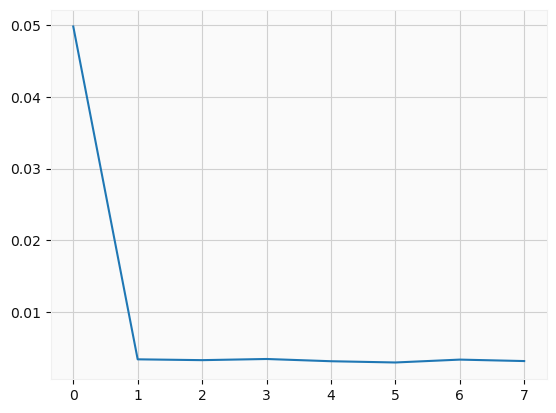

In [22]:
plt.plot(history.history['loss'])

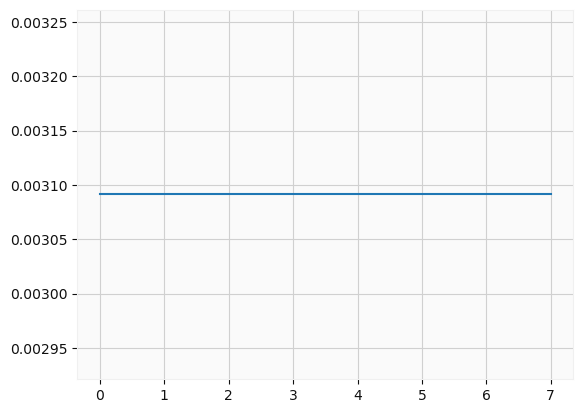

In [24]:
plt.plot(history.history['accuracy'])

# Model Prediction

6/6 [==============================] - 1s 3ms/step


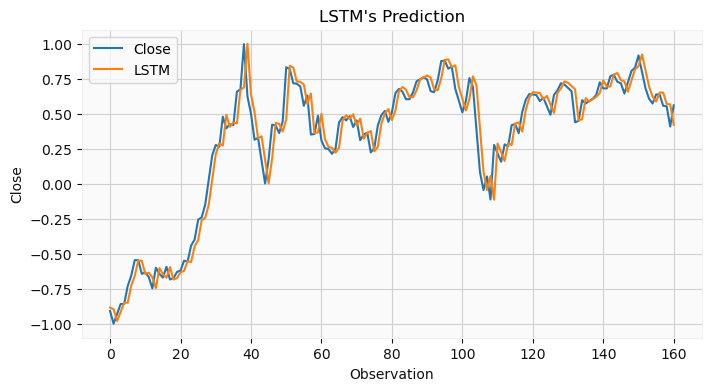

In [26]:

# Make predictions on the test data using the LSTM model
y_pred_test_lstm = model.predict(X_test)

# Create a figure with a specific figure size
fig = plt.figure(figsize=(8, 4))

# Plot the true values of the target variable in the test set
plt.plot(y_test[:,0], label='Close')

# Plot the predicted values
plt.plot(y_pred_test_lstm, label='LSTM')

# Add a title, x-axis label, and y-axis label to the plot
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Close')

# Add a legend to distinguish the true values and the predicted values
plt.legend()

# Display the plot
plt.show()

In [27]:
# Restore the normalized data
reduction_Lstm_pred = scaler.inverse_transform(y_pred_test_lstm)
reduction_test = df.iloc[split_point:].copy()
reduction_y_test = reduction_test[predict_days:]

# Model evaluation

There are three common error metrics used to evaluate and report the performance of a regression model: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE)."

In [ ]:
print("Mean Absolute Error:", mean_absolute_error(reduction_y_test, reduction_Lstm_pred))
print('Mean Squared Error:', mean_squared_error(reduction_y_test, reduction_Lstm_pred))
print('Root Mean Squared Error:', sqrt(mean_squared_error(reduction_y_test, reduction_Lstm_pred)))
print("Coefficient of Determination:", r2_score(reduction_y_test, reduction_Lstm_pred))

Mean Absolute Error: 1.2518793899820457
Mean Squared Error: 2.898456343312268
Root Mean Squared Error: 1.7024853430535805
Coefficient of Determination: 0.9439186962991296


The Mean Absolute Error (MAE) of 1.25 indicates that, on average, the model is off by about 1.25 units. The Mean Squared Error (MSE) of 2.90 indicates that the model's errors are generally more severe, as the square of the errors are used in the calculation. The Root Mean Squared Error (RMSE) of 1.70 is the square root of the MSE and gives a more interpretable error measure in the same units as the target variable.

The Coefficient of Determination (R^2) of 0.94 indicates that the model explains about 94% of the variance in the target variable. An R^2 value of 1.0 indicates a perfect fit, while an R^2 value of 0 indicates that the model does not explain any of the variance in the target variable.

Overall, the model appears to have good performance, with relatively low error and a high R^2 value.